In [3]:
from PIL import Image
from scipy.ndimage import filters
import pandas as pd
import numpy as np
import os
import glob
import warnings
warnings.filterwarnings("ignore")


In [6]:
def cnn_model(path_loc):
    import tensorflow as tf
    import keras
    from keras.models import Sequential
    from keras.layers import Convolution2D
    from keras.layers import MaxPool2D
    from keras.layers import Flatten
    from keras.layers import Dense
    
    # Initializing CNN
        
    classifier = Sequential()
    
    # Step 1 : convolution
    classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))

    # Step 2 : Pooling
    classifier.add(MaxPool2D(pool_size=(2,2)))

    # Adding second convolution layer.
    classifier.add(Convolution2D(32,3,3,activation='relu'))
    classifier.add(MaxPool2D(pool_size=(2,2)))
        
    # step 3 : flattening
    classifier.add(Flatten())

    # step 4 : Full connection
    classifier.add(Dense(output_dim= 128,activation='relu')) 
    classifier.add(Dense(output_dim=4,activation='softmax'))

    classifier.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

    # fitting CNN to the images

    from keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale = 1./255, # image agumentation
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
    test_datagen = ImageDataGenerator(rescale=1./255) # test data don't need much image agumentation.
    import os

    os.chdir(path_loc) # train and test path location
    training_set = train_datagen.flow_from_directory('E:/2018/IEEE/Multi-Traffic Scene Perception Based on Supervised/code/multi traffic/accident case/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical') 

    test_set = test_datagen.flow_from_directory('E:/2018/IEEE/Multi-Traffic Scene Perception Based on Supervised/code/multi traffic/accident case/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                           class_mode = 'categorical')

    # buliding model and performing model validation simultaneously
    history=classifier.fit_generator(training_set,
                         steps_per_epoch = 40, # number of images to be taken from training data set. 
                         nb_epoch = 10, 
                         validation_data = test_set,
                         validation_steps = 10) # number of images to be taken from test data set.

    return (training_set ,classifier,history)




In [7]:
training_set ,classifier,history= cnn_model('E:/2018/IEEE/Multi-Traffic Scene Perception Based on Supervised/code/multi traffic/accident case')


Found 199 images belonging to 4 classes.
Found 60 images belonging to 4 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
40/40 [==============================] - 20s 488ms/step - loss: 0.9079 - acc: 0.6251 - val_loss: 0.6563 - val_acc: 0.7333
Epoch 2/10
40/40 [==============================] - 15s 363ms/step - loss: 0.5077 - acc: 0.8046 - val_loss: 0.8920 - val_acc: 0.6667
Epoch 3/10
40/40 [==============================] - 15s 378ms/step - loss: 0.3990 - acc: 0.8524 - val_loss: 0.6459 - val_acc: 0.7167
Epoch 4/10
40/40 [==============================] - 15s 378ms/step - loss: 0.2639 - acc: 0.9147 - val_loss: 0.1710 - val_acc: 0.9333
Epoch 5/10
40/40 [==============================] - 14s 355ms/step - loss: 0.2155 - acc: 0.9111 - val_loss: 0.1330 - val_acc: 0.9833
Epoch 6/10
40/40 [==============================] - 13s 337ms/step - loss: 0.1614 - acc: 0.9534 - val_loss: 0.0607 - val_acc: 0.9833
Epoch 7/10
40/40 [==============================] - 14s 338ms/step - loss

In [10]:
epochs = 10

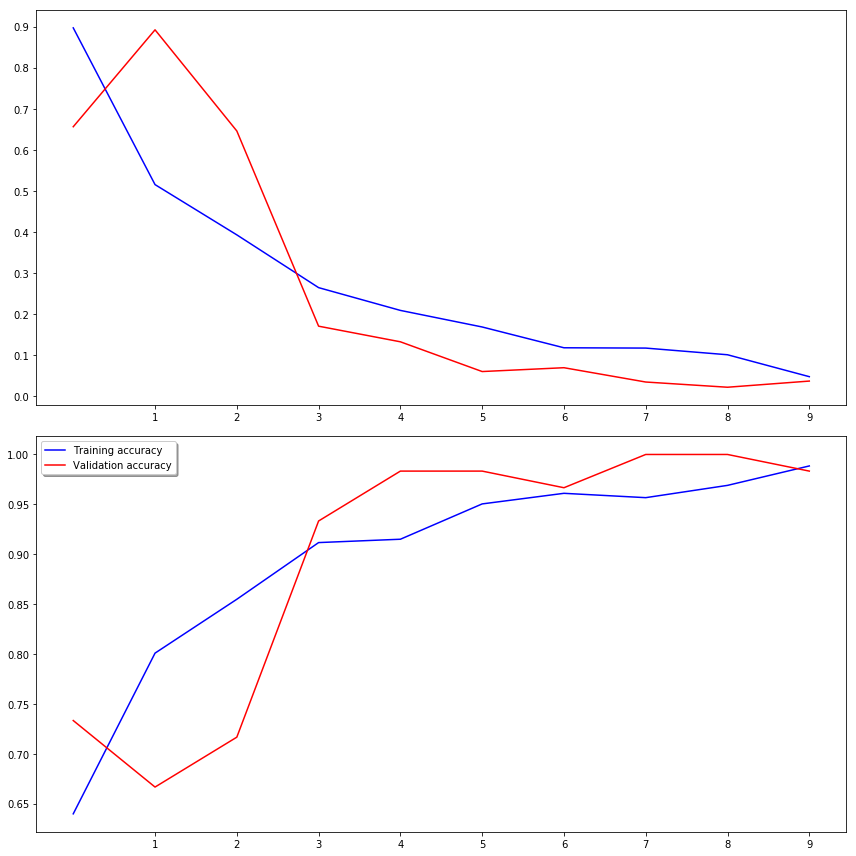

In [11]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()


In [4]:
import numpy as np
from keras.preprocessing import image


In [5]:
training_set

In [6]:
%matplotlib inline
test_image = image.load_img('F:/Multitraffic/Multitraffic/accident case/test/3 car accident in night_wo_lamp/images (14).jpg', target_size = (64, 64))
test_image.show()



In [7]:
test_image = image.img_to_array(test_image)
test_image # should give us (64,64,3)
np.shape(test_image) # (64,64,3) beacuse it is a colour image(RGB)


(64, 64, 3)

In [8]:
test_image = np.expand_dims(test_image, axis = 0)
test_image# now it shld show (1,64,64,3)
np.shape(test_image)



(1, 64, 64, 3)

In [9]:
training_set.class_indices


{'1 cars without accident': 0,
 '2 car accident in fog': 1,
 '3 car accident in night_wo_lamp': 2,
 '4 car accident in rainy night': 3}

In [10]:
result = classifier.predict_classes(test_image)
# we are trying to predict
result # gv us 1
result[0]


2